# StarGazer

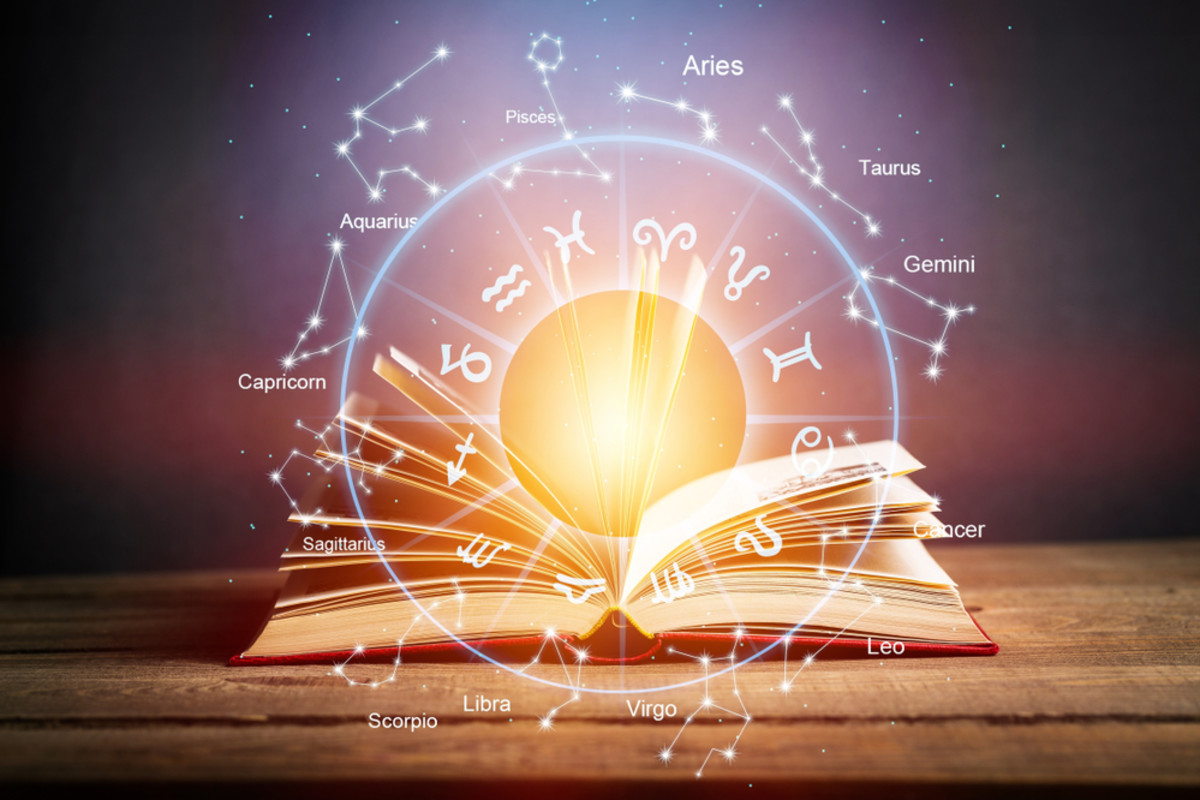

In [1]:
import os
import random
import re
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import gradio as gr

In [2]:
df = pd.read_csv("Zodiac Dataset.csv", encoding="latin1")

In [3]:
print("Shape of dataset :- ",df.shape)
print("size of dataset :- ",df.size)

Shape of dataset :-  (503, 11)
size of dataset :-  5533


In [4]:
df.columns

Index(['Name', 'Date of Birth', 'Zodiac Sign', 'Lucky Color', 'Lucky Number',
       'Mood', 'Description', 'Birth Place', 'Occupation', 'Hobby',
       'Favorite Cuisine'],
      dtype='object')

In [5]:
df.head()

,Name,Date of Birth,Zodiac Sign,Lucky Color,Lucky Number,Mood,Description,Birth Place,Occupation,Hobby,Favorite Cuisine
0,Onkar Srinivas,2001-05-02,Taurus,DarkSeaGreen,87.0,Calm,Occaecati iusto itaque dolorum incidunt invent...,Udaipur,Psychiatric nurse,Painting,Indian
1,Neysa Gokhale,1944-10-17,Libra,GoldenRod,11.0,Calm,Doloribus voluptatibus aperiam voluptatum esse...,Navi Mumbai,"Psychologist, sport and exercise",Sports,Mexican
2,Vaibhav Bansal,2004-07-02,Cancer,LightPink,85.0,Calm,Eos neque reiciendis maxime magnam esse iusto ...,Rewa,"Horticulturist, commercial",Sports,Japanese
3,Kaira Guha,1984-03-12,Pisces,SeaGreen,91.0,Relaxed,Voluptatibus consequuntur repudiandae similiqu...,Raurkela Industrial Township,Insurance broker,Painting,Mexican
4,Zain Sundaram,1968-02-06,Aquarius,LightGray,7.0,Energetic,Odio fugiat cupiditate architecto ab odio dolo...,Rohtak,Hydrologist,Traveling,Mexican


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              503 non-null    object 
 1   Date of Birth     503 non-null    object 
 2   Zodiac Sign       503 non-null    object 
 3   Lucky Color       501 non-null    object 
 4   Lucky Number      500 non-null    float64
 5   Mood              502 non-null    object 
 6   Description       454 non-null    object 
 7   Birth Place       503 non-null    object 
 8   Occupation        503 non-null    object 
 9   Hobby             503 non-null    object 
 10  Favorite Cuisine  503 non-null    object 
dtypes: float64(1), object(10)
memory usage: 43.4+ KB


In [7]:
df.count()

Name                503
Date of Birth       503
Zodiac Sign         503
Lucky Color         501
Lucky Number        500
Mood                502
Description         454
Birth Place         503
Occupation          503
Hobby               503
Favorite Cuisine    503
dtype: int64

In [8]:
df.describe()

,Lucky Number
count,500.000000
mean,49.300000
std,28.222811
min,1.000000
25%,24.750000
50%,50.000000
75%,73.000000
max,99.000000


# DATA CLEANING

In [10]:
df.isnull().sum()

Name                 0
Date of Birth        0
Zodiac Sign          0
Lucky Color          2
Lucky Number         3
Mood                 1
Description         49
Birth Place          0
Occupation           0
Hobby                0
Favorite Cuisine     0
dtype: int64

In [11]:
x = df['Lucky Number'].median()
print("median of Lucky Number column - ",x)

median of Lucky Number column -  50.0


In [12]:
df.fillna({"Lucky Number": x}, inplace=True)

In [13]:
df.fillna({"Lucky Color": x}, inplace=True)

In [14]:
df.fillna({"Mood": x}, inplace=True)

## Drop entire column due to large amount of missing values¶

In [16]:
df.isnull().sum()

Name                 0
Date of Birth        0
Zodiac Sign          0
Lucky Color          0
Lucky Number         0
Mood                 0
Description         49
Birth Place          0
Occupation           0
Hobby                0
Favorite Cuisine     0
dtype: int64

In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
498    False
499    False
500     True
501     True
502     True
Length: 503, dtype: bool

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

### Dataset Status After Cleaning"

In [21]:
print("Shape of dataset after cleaning :- ",df.shape)
print("size of dataset after cleaning :- ",df.size)

Shape of dataset after cleaning :-  (500, 11)
size of dataset after cleaning :-  5500


In [22]:
df.head()

,Name,Date of Birth,Zodiac Sign,Lucky Color,Lucky Number,Mood,Description,Birth Place,Occupation,Hobby,Favorite Cuisine
0,Onkar Srinivas,2001-05-02,Taurus,DarkSeaGreen,87.0,Calm,Occaecati iusto itaque dolorum incidunt invent...,Udaipur,Psychiatric nurse,Painting,Indian
1,Neysa Gokhale,1944-10-17,Libra,GoldenRod,11.0,Calm,Doloribus voluptatibus aperiam voluptatum esse...,Navi Mumbai,"Psychologist, sport and exercise",Sports,Mexican
2,Vaibhav Bansal,2004-07-02,Cancer,LightPink,85.0,Calm,Eos neque reiciendis maxime magnam esse iusto ...,Rewa,"Horticulturist, commercial",Sports,Japanese
3,Kaira Guha,1984-03-12,Pisces,SeaGreen,91.0,Relaxed,Voluptatibus consequuntur repudiandae similiqu...,Raurkela Industrial Township,Insurance broker,Painting,Mexican
4,Zain Sundaram,1968-02-06,Aquarius,LightGray,7.0,Energetic,Odio fugiat cupiditate architecto ab odio dolo...,Rohtak,Hydrologist,Traveling,Mexican


# MODEL TRAINING


In [24]:

# Try to find zodiac label column
zodiac_col = None
for col in df.columns:
    if re.search(r"zodiac|sign", col, re.IGNORECASE):
        zodiac_col = col
        break
if zodiac_col is None:
    # fallback: assume last column is label
    zodiac_col = df.columns[-1]

# Try to find Month and Day columns; else derive from date-like column
month_col = None
day_col = None
for col in df.columns:
    if re.search(r"month", col, re.IGNORECASE):
        month_col = col
    if re.search(r"day", col, re.IGNORECASE):
        day_col = col

if month_col and day_col:
    df['Month'] = df[month_col].astype(int)
    df['Day'] = df[day_col].astype(int)
else:
    # try to find date column
    date_col = None
    for col in df.columns:
        if re.search(r"date|dob|birth", col, re.IGNORECASE):
            date_col = col
            break
    if date_col:
        # parse date
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        df = df.dropna(subset=[date_col])
        df['Month'] = df[date_col].dt.month
        df['Day'] = df[date_col].dt.day
    else:
        # if nothing found, try to infer from first two numeric columns (best-effort)
        numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
        if len(numeric_cols) >= 2:
            df['Month'] = df[numeric_cols[0]].astype(int)
            df['Day'] = df[numeric_cols[1]].astype(int)
        else:
            raise ValueError("Couldn't infer Month/Day columns. Make sure your CSV has month/day or a date column.")

# Clean label column: strip and standardize
df['ZodiacLabelRaw'] = df[zodiac_col].astype(str).str.strip()

# Filter rows with valid month/day
df = df[(df['Month'].between(1,12)) & (df['Day'].between(1,31))].copy()
if df.shape[0] < 20:
    print("Warning: very few rows after cleaning:", df.shape)

# Encode labels
le = LabelEncoder()
df['ZodiacEncoded'] = le.fit_transform(df['ZodiacLabelRaw'])

# Prepare features and labels
X = df[['Month', 'Day']].values
y = df['ZodiacEncoded'].values

# Train/test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y if len(np.unique(y))>1 else None)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate quickly
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) if len(y_test)>0 else 0.0
print(f"✅ Model trained. Test samples: {len(y_test)}  —  Accuracy: {acc*100:.2f}%")
print("Label classes (index -> sign):")
for idx, sign in enumerate(le.classes_):
    print(f"  {idx} -> {sign}")

# -------------------------
# 2) Random messages per zodiac sign
# -------------------------
# Create a dictionary for 12 zodiac signs. If your dataset has different labels naming,
# we will map predicted label to the encoding's class names (le.classes_). We'll make a message list for each.
default_messages = {
    'Aries': [
        "Today is a fresh start—take the lead and trust yourself.",
        "Energy is high; channel it into something productive.",
        "A surprise may push you out of your comfort zone—embrace it."
    ],
    'Taurus': [
        "Patience will bring rewards; stay steady today.",
        "An opportunity for comfort and stability may arrive.",
        "Focus on what grounds you and avoid unnecessary risks."
    ],
    'Gemini': [
        "Communication is favored—speak up and listen carefully.",
        "You’ll find curiosity leading to interesting conversations.",
        "Multi-tasking works for you today—prioritize well."
    ],
    'Cancer': [
        "Emotional clarity will guide you—take time for self-care.",
        "A family or close bond needs your empathy today.",
        "Trust your intuition; it’s especially sharp now."
    ],
    'Leo': [
        "Confidence attracts positive attention—shine on.",
        "A creative spark might lead to something exciting.",
        "Lead with heart and people will respond positively."
    ],
    'Virgo': [
        "Details matter today—your focus will pay off.",
        "Organize one area of your life and feel the calm.",
        "A practical approach will help solve a lingering issue."
    ],
    'Libra': [
        "Balance and harmony are on the agenda—seek fairness.",
        "A relationship may need gentle diplomacy today.",
        "Find beauty in small things and share it with others."
    ],
    'Scorpio': [
        "Your intuition is powerful—act when you feel certain.",
        "Deep focus leads to breakthrough—don’t rush it.",
        "A mystery may reveal itself if you pay attention."
    ],
    'Sagittarius': [
        "Adventure calls—say yes to a new learning opportunity.",
        "Optimism opens doors—keep a positive mindset.",
        "A small risk may expand your horizons."
    ],
    'Capricorn': [
        "Hard work brings results—stay persistent and focused.",
        "A plan you’ve made will start showing progress.",
        "Take responsibility for one thing and watch it improve."
    ],
    'Aquarius': [
        "Innovative ideas flow—jot them down and revisit.",
        "Community connections may lead to a helpful ally.",
        "Think outside the box and test a new approach."
    ],
    'Pisces': [
        "Creativity and compassion guide you—express yourself.",
        "Listen to your dreams—they may contain answers.",
        "Take a quiet moment to recharge; inspiration follows."
    ]
}

# Map messages to the encoder's class names: ensure capitalization
messages_map = {}
for cls in le.classes_:
    key = str(cls).strip().capitalize()
    if key in default_messages:
        messages_map[cls] = default_messages[key]
    else:
        # if dataset used slightly different names, try to match ignoring case
        found = None
        for k in default_messages:
            if k.lower() in str(cls).lower() or str(cls).lower() in k.lower():
                found = k
                break
        messages_map[cls] = default_messages[found] if found else [
            "This is your day—trust yourself.",
            "Positive change is on the horizon.",
            "Small steps today create big results."
        ]

# -------------------------
# 3) Combined predict + random-message function
# -------------------------
def predict_and_message(month, day):
    # validate input
    try:
        m = int(round(float(month)))
        d = int(round(float(day)))
    except Exception:
        return "⚠️ Please enter valid Month and Day numbers."

    if not (1 <= m <= 12 and 1 <= d <= 31):
        return "⚠️ Month must be 1-12 and Day must be 1-31."

    X_in = np.array([[m, d]])
    try:
        pred_enc = model.predict(X_in)
    except Exception as e:
        return f"❌ Error predicting: {e}"

    # pred_enc might be array like [2]
    enc_value = pred_enc[0] if hasattr(pred_enc, '__len__') else pred_enc
    # map back to label string
    try:
        sign_label = le.inverse_transform([enc_value])[0]
    except Exception:
        # if inverse transform fails, just cast
        sign_label = str(enc_value)

    # choose random message
    msgs = messages_map.get(sign_label, [
        "This is your day—trust yourself.",
        "Positive change is on the horizon.",
        "Small steps today create big results."
    ])
    chosen = random.choice(msgs)

    output = f"✨ Predicted Zodiac Sign: {str(sign_label).capitalize()}\n\n🔮 Today's Horoscope (random):\n{chosen}"
    return output



✅ Model trained. Test samples: 75  —  Accuracy: 100.00%
Label classes (index -> sign):
  0 -> Aquarius
  1 -> Aries
  2 -> Cancer
  3 -> Capricorn
  4 -> Gemini
  5 -> Leo
  6 -> Libra
  7 -> Pisces
  8 -> Sagittarius
  9 -> Scorpio
  10 -> Taurus
  11 -> Virgo


# WEB SCRAPPING

In [26]:
# --- Imports ---
import time, random, re
import numpy as np
from bs4 import BeautifulSoup
import requests

# --- Safe HTTP GET with retries ---
DEFAULT_HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "en-US,en;q=0.9"
}

def _safe_get(url, timeout=8, max_attempts=2):
    for attempt in range(max_attempts):
        try:
            r = requests.get(url, headers=DEFAULT_HEADERS, timeout=timeout)
            r.raise_for_status()
            return r
        except Exception:
            time.sleep(0.5 + random.random() * 0.7)
    return None

# --- Horoscope Scraper with cleaning ---
def scrape_horoscope_for_sign(sign):
    """
    sign: lower-case zodiac name like 'capricorn' or 'scorpio'
    returns: (source_name, text) or (None, error_message)
    """
    s = str(sign).strip().lower()
    if not s:
        return None, "Invalid sign"

    candidates = [
        {
            "name": "Horoscope.com",
            "url": "https://www.horoscope.com/us/horoscopes/general/horoscope-general-daily-today.aspx?sign={}",
            "format": "index",
            "map": {'aries':1,'taurus':2,'gemini':3,'cancer':4,'leo':5,'virgo':6,'libra':7,'scorpio':8,'sagittarius':9,'capricorn':10,'aquarius':11,'pisces':12},
            "selectors": [
                lambda soup: soup.find('p', class_='horoscope-content'),
                lambda soup: soup.find('div', class_='main-horoscope').find('p') if soup.find('div', class_='main-horoscope') else None,
            ]
        },
        {
            "name": "AstroSage",
            "url": f"https://www.astrosage.com/horoscope/daily-horoscope/{s}.asp",
            "format": None,
            "selectors": [
                lambda soup: soup.find('div', class_='horoscopeBox'),
                lambda soup: soup.find('div', id='dailyhoro'),
            ]
        },
        {
            "name": "GaneshaSpeaks",
            "url": f"https://www.ganeshaspeaks.com/horoscopes/daily-horoscope/{s}/",
            "format": None,
            "selectors": [
                lambda soup: soup.find('div', class_='horo-content'),
                lambda soup: soup.find('div', class_='daily-horoscope-content'),
            ]
        }
    ]

    for cand in candidates:
        try:
            if cand.get("format") == "index":
                idx = cand["map"].get(s)
                if not idx:
                    continue
                url = cand["url"].format(idx)
            else:
                url = cand["url"]

            resp = _safe_get(url)
            if not resp:
                continue
            soup = BeautifulSoup(resp.text, "lxml")

            for fn in cand["selectors"]:
                el = fn(soup)
                if el:
                    txt = el.get_text(separator=' ', strip=True)
                    # 🧹 Clean unwanted parts
                    txt = re.sub(r'(Yesterday|Tomorrow|Weekly|Monthly|Career|Love|Health|Chinese|Tarot|Numerology).*', '', txt)
                    txt = re.sub(r'Get a 5 minute.*', '', txt)
                    txt = re.sub(r'\s+', ' ', txt).strip()
                    if len(txt) > 40:
                        return cand["name"], txt
        except Exception:
            continue

    return None, f"No horoscope found for {s.capitalize()} after trying multiple sources."

# --- Fallback zodiac labels ---
FALLBACK_LABELS = ['aries','taurus','gemini','cancer','leo','virgo','libra','scorpio','sagittarius','capricorn','aquarius','pisces']

# --- Main Integration Function ---
def predict_then_scrape(month, day):
    # Input validation
    try:
        if month is None or day is None:
            return "⚠️ Enter both month and day."
        m = int(round(float(month)))
        d = int(round(float(day)))
    except Exception as e:
        return f"⚠️ Invalid inputs: {e}"

    if not (1 <= m <= 12 and 1 <= d <= 31):
        return "⚠️ Month must be 1-12 and day 1-31."

    # Check if model exists
    try:
        model
    except NameError:
        return "❌ Trained model 'model' not found. Run the cell where you trained it."

    # Check label encoder
    label_encoder = None
    try:
        le
        label_encoder = le
    except Exception:
        label_encoder = None

    # Predict
    try:
        X_in = np.array([[m, d]])
        pred = model.predict(X_in)
    except Exception as e:
        return f"❌ Error calling model.predict: {e}"

    # Process prediction
    try:
        if isinstance(pred, np.ndarray):
            pred_value = pred[0]
        else:
            pred_value = pred

        if isinstance(pred_value, (np.integer, int, float)) and label_encoder is not None:
            try:
                pred_label = label_encoder.inverse_transform([int(pred_value)])[0]
            except Exception:
                idx = int(pred_value)
                pred_label = FALLBACK_LABELS[idx] if 0 <= idx < len(FALLBACK_LABELS) else str(pred_value)
        elif isinstance(pred_value, (np.integer, int, float)):
            idx = int(pred_value)
            pred_label = FALLBACK_LABELS[idx] if 0 <= idx < len(FALLBACK_LABELS) else str(pred_value)
        else:
            pred_label = str(pred_value)
    except Exception as e:
        return f"❌ Error processing model output: {e} (raw: {repr(pred)})"

    pred_label_clean = re.sub(r'[^a-zA-Z]', '', pred_label).lower()

    # Scrape horoscope
    source, text = scrape_horoscope_for_sign(pred_label_clean)
    if source is None:
        return f"✨ Predicted Zodiac Sign: {pred_label.capitalize()}\n\n🔮 Today's Horoscope:\n{text}"
    else:
        return f"✨ Predicted Zodiac Sign: {pred_label.capitalize()}\n\n🔮 Today's Horoscope (source: {source}):\n{text}"




In [64]:
# # --- Gradio UI ---
# import gradio as gr

# css = """
# #result_textbox textarea {
#     font-size: 18px;
#     line-height: 1.6;
# }
# """

# try:
#     iface = gr.Interface(
#         fn=predict_then_scrape,
#         inputs=[gr.Number(label="Month (1-12)"), gr.Number(label="Day (1-31)")],
#         outputs=gr.Textbox(label="Result", lines=12, elem_id="result_textbox"),
#         title="Astro: Predict zodiac & scrape live daily horoscope",
#         description="Enter birth month and day. Model predicts zodiac and the app scrapes a live daily horoscope from popular sites.",
#         css=css
#     )
#     iface.launch(inline=True)
# except Exception as e:
#     print("⚠️ Gradio failed to start. You can still call predict_then_scrape(month, day) directly.")
#     print(e)


In [71]:
import pickle
with open('StarGazer.pkl','wb') as f:
    pickle.dump(model,f)
print('Done!')

Done!


In [73]:
os.getcwd()

'C:\\Users\\sharm\\StarGazer'